# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Assignment_7</b></u>

### Roster Name: GURSIMRAN SINGH
### Preferred Name (if different): SIMRAN
### Student ID: 015212210
### Email address: gursimransingh@sjsu.edu


##  <u>References and sources </u>

https://medium.com/the-owl/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://mode.com/blog/violin-plot-examples/

https://stackabuse.com/matplotlib-change-scatter-plot-marker-size/

##  <u>Solution</u>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import accuracy_score

In [2]:
mnist = load_digits()
print(mnist.images[0:2])
print(mnist.images.shape)

[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
  [ 0.  0.  0. 11. 16.  9.  0.  0.]
  [ 0.  0.  3. 15. 16.  6.  0.  0.]
  [ 0.  7. 15. 16. 16.  2.  0.  0.]
  [ 0.  0.  1. 16. 16.  3.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  0. 11. 16. 10.  0.  0.]]]
(1797, 8, 8)


### Converting the loaded image to 1d array

In [3]:
n_samples = len(mnist.images)
print(n_samples)
images = mnist.images.reshape((n_samples, -1))
print(images[1])
labels = mnist.target
print(labels[0:10])

1797
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
[0 1 2 3 4 5 6 7 8 9]


In [4]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(images,labels,random_state=0,test_size=0.2, stratify = mnist.target)
Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape

((1437, 64), (1437,), (360, 64), (360,))

### Implementing MLPClassifier

In [5]:
model1 = MLPClassifier(random_state=1, max_iter= 1500)
model2= MLPClassifier(hidden_layer_sizes= (400,150,50), activation='relu',random_state=1,max_iter= 1000)
model3= MLPClassifier(hidden_layer_sizes= (400,150,50), activation='logistic',random_state=1,max_iter= 1000)
model4= MLPClassifier(hidden_layer_sizes= (64,32,8), activation='relu',random_state=1,max_iter= 1000)
model5= MLPClassifier(hidden_layer_sizes= (32,16), activation='relu',random_state=1,max_iter= 1000)
model6= MLPClassifier(hidden_layer_sizes= (120,64,16), activation='relu',random_state=1,max_iter= 1000)
model7= MLPClassifier(hidden_layer_sizes= (320,120,32), activation='relu',random_state=1,max_iter= 1000)

In [6]:
d1=cross_val_score(model1,Xtrain,Ytrain,cv=5)
d2=cross_val_score(model2,Xtrain,Ytrain,cv=5)
d3=cross_val_score(model3,Xtrain,Ytrain,cv=5)
d4=cross_val_score(model4,Xtrain,Ytrain,cv=5)
d5=cross_val_score(model5,Xtrain,Ytrain,cv=5)
d6=cross_val_score(model6,Xtrain,Ytrain,cv=5)
d7=cross_val_score(model7,Xtrain,Ytrain,cv=5)


###predicting on the test set

In [7]:
model=[model1,model2,model3,model4,model5,model6,model7]
pred=[]
for i in model:
    i.fit(Xtrain,Ytrain)
    pred_values=i.predict(Xtest)
    val1 = accuracy_score(Ytest,pred_values)
    pred.append(val1)
print(pred)


[0.9611111111111111, 0.9833333333333333, 0.975, 0.9527777777777777, 0.975, 0.9666666666666667, 0.975]


In [8]:
for i in pred:
    print(i)

0.9611111111111111
0.9833333333333333
0.975
0.9527777777777777
0.975
0.9666666666666667
0.975


[Text(0, 0, 'Model1'),
 Text(1, 0, 'Model2'),
 Text(2, 0, 'Model3'),
 Text(3, 0, 'model4'),
 Text(4, 0, 'Model5'),
 Text(5, 0, 'model6'),
 Text(6, 0, 'model7')]

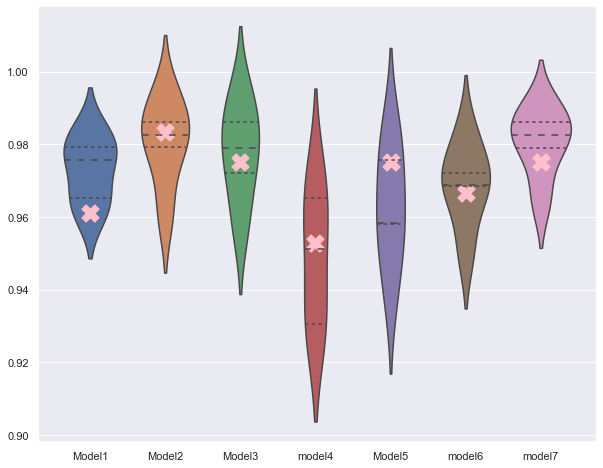

In [9]:
sns.set(rc={'figure.figsize':(10, 8)})
ax = sns.violinplot(gridsize =100 , inner='quartile',data = [d1,d2,d3,d4,d5,d6,d7],random_state=1)
z=0
for i in pred:
    ax.scatter(z,i,marker='X',color='pink',s=300)
    z =z+1
ax.set_xticklabels(['Model1','Model2','Model3','model4','Model5','model6','model7'])